In [23]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')
from fantasy_stats_from_pbp import *

In [2]:
# read in df from nfl fast R data collected
pbp = pd.read_pickle('../data/raw/nfl_pbp_data.pkl')
pbp.head()

,aborted_play,air_epa,air_wpa,air_yards,assist_tackle,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,...,xyac_success,yac_epa,yac_wpa,yardline_100,yards_after_catch,yards_gained,ydsnet,ydstogo,year,yrdln
0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.0,NaN,0.0,6.0,0,1999,ARI 30
1,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,77.0,NaN,0.0,6.0,10,1999,PHI 23
2,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,77.0,NaN,1.0,6.0,10,1999,PHI 23
3,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,76.0,NaN,0.0,6.0,9,1999,PHI 24
4,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,81.0,NaN,10.0,6.0,14,1999,PHI 19


In [6]:
josh_allen_id = '00-0034857'
josh_allen_stats = create_player_stats(josh_allen_id, pbp)
josh_allen_stats['fantasy_pts'] = josh_allen_stats.apply(lambda row: calculate_espn_ppr_score(row), axis=1)
josh_allen_stats

,id,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,receive_touchdown,fantasy_pts
season,,,,,,,,,,,,
2018,00-0034857,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,0.0,206.86
2019,00-0034857,0,3089.0,20.0,9.0,9.0,4.0,510.0,3.0,0.0,0.0,288.56
2020,00-0034857,1,4544.0,37.0,8.0,10.0,6.0,421.0,0.0,12.0,1.0,396.06
2021,00-0034857,0,4168.0,34.0,6.0,15.0,3.0,700.0,3.0,0.0,0.0,378.72
2022,00-0034857,0,4029.0,32.0,7.0,13.0,5.0,746.0,2.0,0.0,0.0,373.76
2023,00-0034857,0,3947.0,27.0,15.0,16.0,3.0,457.0,3.0,0.0,0.0,369.58
2024,00-0034857,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,0.0,372.34


In [16]:
#all_players = calculate_all_players_season_stats(save_to_csv=True, csv_filepath='../data/processed/season_stats_05_17.csv')
all_players = pd.read_csv('../data/processed/season_stats_05_17.csv')
rosters = pd.read_csv('../data/raw/rosters.csv', index_col=0).reset_index(drop=True)
all_players = pd.merge(all_players, rosters, how='left', left_on=['id', 'season'], right_on=['gsis_id', 'season'])
all_players.head()

C:\Users\irela\AppData\Local\Temp\ipykernel_12092\3239920645.py:3: DtypeWarning: Columns (4,31) have mixed types. Specify dtype option on import or set low_memory=False.
  rosters = pd.read_csv('../data/raw/rosters.csv', index_col=0).reset_index(drop=True)


,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,smart_id,entry_year,rookie_year,draft_club,ngs_position,week,game_type,status_description_abbr,football_name,draft_number
0,1999,0,1276.0,7.0,0.0,9.0,6.0,33.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,0,1047.0,2.0,0.0,8.0,0.0,68.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,0,134.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,1991.0,1991.0,NaN,NaN,18.0,WC,A01,Doug,NaN
4,2003,0,16.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,1991.0,1991.0,NaN,NaN,19.0,DIV,A01,Doug,NaN


In [17]:
unnecessary_cols = ['espn_id', 'sportradar_id', 'yahoo_id',
       'rotowire_id', 'pff_id', 'pfr_id', 'fantasy_data_id', 'sleeper_id',
       'esb_id', 'gsis_it_id', 'smart_id', 'entry_year', 'draft_club', 'ngs_position', 'week',
       'game_type', 'status_description_abbr', 'football_name',
       'draft_number']
all_players = all_players[[col for col in all_players.columns if col not in unnecessary_cols]]
all_players.head()

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,first_name,last_name,birth_date,height,weight,college,gsis_id,years_exp,headshot_url,rookie_year
0,1999,0,1276.0,7.0,0.0,9.0,6.0,33.0,0.0,0.0,...,Douglas,Pederson,1968-01-31,75.0,216.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN
1,2000,0,1047.0,2.0,0.0,8.0,0.0,68.0,0.0,0.0,...,Douglas,Pederson,1968-01-31,75.0,216.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN
2,2001,0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,Douglas,Pederson,1968-01-31,75.0,220.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN
3,2002,0,134.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,Doug,Pederson,1968-01-31,75.0,220.0,NaN,00-0012726,11.0,https://static.www.nfl.com/image/private/f_aut...,1991.0
4,2003,0,16.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0,...,Doug,Pederson,1968-01-31,75.0,220.0,NaN,00-0012726,12.0,https://static.www.nfl.com/image/private/f_aut...,1991.0


In [19]:
fantasy_positions = ['QB', 'RB', 'TE', 'WR', 'FB'] # Not taking kickers or defense into account
all_players = all_players[all_players['position'].isin(fantasy_positions)]

In [ ]:
#josh_allen_id = '00-0034857'
#jamar_chase_id = '00-0036900'

## EDA

How are fantasy points distributed by position? (e.g., RBs vs. WRs)

In [22]:
all_players.groupby('position')['fantasy_pts'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
FB,601.0,26.685225,30.381063,-2.00,6.60,17.10,36.600,222.10
QB,2012.0,99.673300,105.649874,-7.28,7.69,56.26,182.405,417.08
RB,3690.0,81.493409,86.483618,-8.00,12.20,50.30,128.050,481.10
TE,916.0,79.987031,68.740352,-2.00,20.90,61.95,123.800,330.90
WR,4323.0,93.190062,85.058646,-6.00,18.60,70.40,149.600,412.90


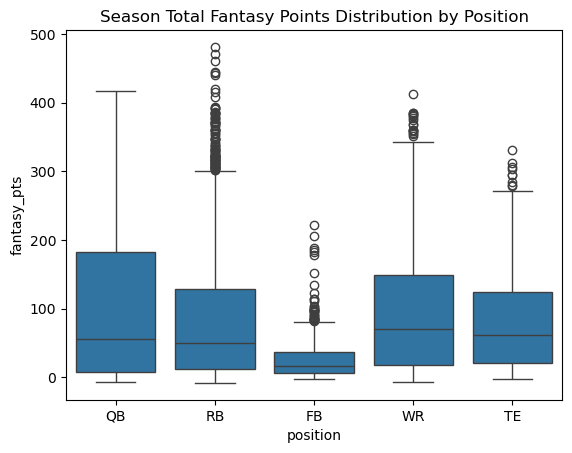

In [25]:
sns.boxplot(data=all_players, x='position', y='fantasy_pts')
plt.title('Season Total Fantasy Points Distribution by Position')
plt.show()

Which positions have the most year-to-year consistency in performance?

What is the correlation between a player’s fantasy finish and:
ADP?
Team offensive stats?
Number of games played?

What’s the average point drop-off between draft rounds?

How volatile are fantasy scores week-to-week or year-to-year?

How close were preseason projections to actual outcomes?

Which positions/players are historically most over- or under-projected?

What level of variance exists in player outcomes vs. projections?

What % of drafted players miss significant time?

How much does injury risk affect fantasy point variability?

Are injury-prone players still top scorers when healthy?

How does team offensive rank affect player fantasy outcomes?

Do players perform better/worse when switching teams?

What impact does a new quarterback or head coach have?

How often do sleepers (late-round picks) end up as top-20 players?

Which draft positions yield the best total fantasy performance?

Are there trends or biases in who gets drafted too early or too late?

### Expanding Josh Allen's stats

In [28]:
ja = all_players[all_players['id']==josh_allen_id]
ja

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,receive_touchdown,id,fantasy_pts
10149,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,0.0,00-0034857,206.86
10150,2019,0,3089.0,20.0,9.0,9.0,4.0,510.0,3.0,0.0,0.0,00-0034857,288.56
10151,2020,1,4544.0,37.0,8.0,10.0,6.0,421.0,0.0,12.0,1.0,00-0034857,396.06
10152,2021,0,4168.0,34.0,6.0,15.0,3.0,700.0,3.0,0.0,0.0,00-0034857,378.72
10153,2022,0,4029.0,32.0,7.0,13.0,5.0,746.0,2.0,0.0,0.0,00-0034857,373.76
10154,2023,0,3947.0,27.0,15.0,16.0,3.0,457.0,3.0,0.0,0.0,00-0034857,369.58
10155,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,0.0,00-0034857,372.34


In [30]:
ja_df = pd.merge(ja, rosters, how='left', left_on=['id', 'season'], right_on=['gsis_id', 'season'])
ja_df

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,smart_id,entry_year,rookie_year,draft_club,ngs_position,week,game_type,status_description_abbr,football_name,draft_number
0,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,17.0,REG,A01,Josh,7.0
1,2019,0,3089.0,20.0,9.0,9.0,4.0,510.0,3.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,18.0,WC,A01,Josh,7.0
2,2020,1,4544.0,37.0,8.0,10.0,6.0,421.0,0.0,12.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,20.0,CON,A01,Josh,7.0
3,2021,0,4168.0,34.0,6.0,15.0,3.0,700.0,3.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,20.0,DIV,A01,Josh,7.0
4,2022,0,4029.0,32.0,7.0,13.0,5.0,746.0,2.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,20.0,DIV,A01,Josh,7.0
5,2023,0,3947.0,27.0,15.0,16.0,3.0,457.0,3.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,20.0,DIV,A01,Josh,7.0
6,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,21.0,CON,A01,Josh,7.0


In [32]:
next_gen_pass = pd.read_csv('../data/raw/next_gen_passing.csv', index_col=0).reset_index(drop=True)
next_gen_pass.head()

,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,...,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
0,2016,REG,0,Drew Brees,QB,NO,2.424238,6.195456,7.550997,-1.355541,...,69.985141,64.783965,5.201176,20.815996,59.033016,00-0020531,Drew,Brees,9,D.Brees
1,2016,REG,0,Joe Flacco,QB,BAL,2.566823,5.187294,7.720937,-2.533644,...,64.880952,64.367218,0.513734,20.995448,62.710625,00-0026158,Joe,Flacco,5,J.Flacco
2,2016,REG,0,Russell Wilson,QB,SEA,2.606104,7.167756,9.240646,-2.072890,...,64.652015,59.305514,5.346501,23.137055,61.277761,00-0029263,Russell,Wilson,3,R.Wilson
3,2016,REG,0,Josh McCown,QB,CLE,2.800770,7.360889,10.353818,-2.992929,...,54.545455,59.587162,-5.041707,23.423919,55.424624,00-0021206,Josh,McCown,13,NaN
4,2016,REG,0,Eli Manning,QB,NYG,2.527473,5.437374,8.191990,-2.754616,...,63.043478,63.397823,-0.354345,20.702627,57.601267,00-0022803,Eli,Manning,10,E.Manning


In [35]:
ja_ng = next_gen_pass[next_gen_pass['player_gsis_id']==josh_allen_id]
ja_ng.head()

,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,...,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
1173,2018,REG,0,Josh Allen,QB,BUF,3.217784,6.478698,11.029344,-4.550646,...,52.812500,60.919193,-8.106693,23.969448,67.257523,00-0034857,Joshua,Allen,17,J.Allen
1201,2018,REG,1,Josh Allen,QB,BUF,3.724800,11.066667,15.266667,-4.200000,...,40.000000,48.891475,-8.891475,27.437653,48.794920,00-0034857,Joshua,Allen,17,J.Allen
1241,2018,REG,2,Josh Allen,QB,BUF,3.504394,7.142222,10.744545,-3.602323,...,54.545455,63.544038,-8.998583,23.379660,63.935646,00-0034857,Joshua,Allen,17,J.Allen
1266,2018,REG,3,Josh Allen,QB,BUF,2.699636,3.708667,8.293182,-4.584515,...,68.181818,64.890220,3.291598,20.755469,52.429551,00-0034857,Joshua,Allen,17,J.Allen
1308,2018,REG,4,Josh Allen,QB,BUF,3.013848,4.710625,9.206061,-4.495436,...,48.484848,64.934962,-16.450113,24.352180,57.575886,00-0034857,Joshua,Allen,17,J.Allen


In [37]:
ja_ng_filtered = ja_ng[ja_ng['week']<18]
ja_ng_grouped = ja_ng_filtered.groupby('season').agg({'player_position':'first',
                                                      'team_abbr':'first',
                                                      'avg_time_to_throw':'mean',
                                                      'avg_completed_air_yards':'mean',
                                                      'avg_intended_air_yards':'mean',
                                                      'avg_air_yards_differential':'mean',
                                                      'aggressiveness':'mean',
                                                        # More to add...
                                                      })
ja_ng_grouped

,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness
season,,,,,,,
2018,QB,BUF,3.217519,6.671415,11.151912,-4.480497,14.229480
2019,QB,BUF,2.851657,6.486776,9.481988,-2.995211,15.239672
2020,QB,BUF,3.045675,6.904674,8.833025,-1.928351,13.308553
2021,QB,BUF,2.919952,6.954294,8.837729,-1.883435,11.936116
2022,QB,BUF,2.856187,7.453386,9.359086,-1.905700,12.621350
2023,QB,BUF,2.890902,5.936266,8.551637,-2.615371,14.445016
2024,QB,BUF,2.892080,5.383275,8.326768,-2.943493,17.051663


In [34]:
ja_df = pd.merge(ja_df, next_gen_pass, how='left', left_on=['id', 'season'], right_on=['player_gsis_id', 'season'])
ja_df

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
0,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,52.812500,60.919193,-8.106693,23.969448,67.257523,00-0034857,Joshua,Allen,17,J.Allen
1,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,40.000000,48.891475,-8.891475,27.437653,48.794920,00-0034857,Joshua,Allen,17,J.Allen
2,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,54.545455,63.544038,-8.998583,23.379660,63.935646,00-0034857,Joshua,Allen,17,J.Allen
3,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,68.181818,64.890220,3.291598,20.755469,52.429551,00-0034857,Joshua,Allen,17,J.Allen
4,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,48.484848,64.934962,-16.450113,24.352180,57.575886,00-0034857,Joshua,Allen,17,J.Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,55.172414,56.745687,-1.573274,24.757465,60.458993,00-0034857,Joshua,Allen,17,J.Allen
125,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,59.259259,57.271931,1.987328,20.651440,45.627335,00-0034857,Joshua,Allen,17,J.Allen
126,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,76.923077,64.237265,12.685812,21.267522,47.495419,00-0034857,Joshua,Allen,17,J.Allen
127,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,72.727273,74.503033,-1.775760,18.502121,39.714664,00-0034857,Joshua,Allen,17,J.Allen
